# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 2<sup>nd </sup> Computational Exercise

In [39]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 14 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,7] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Monte Carlo evaluation of the following 1D integral:


\begin{equation} I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1 \end{equation}

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

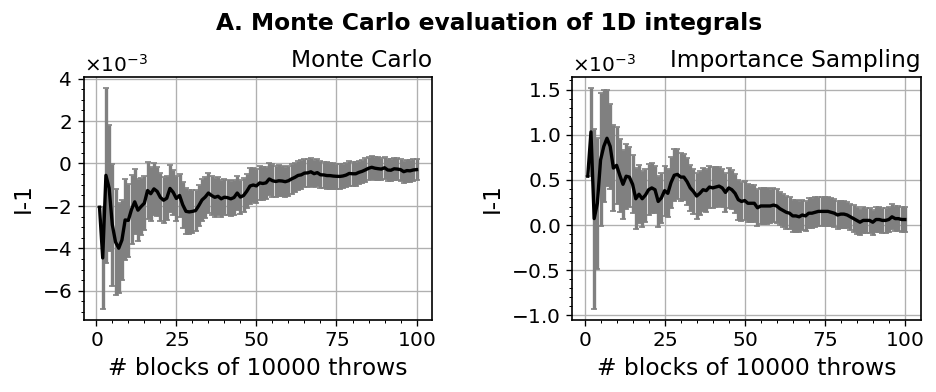

In [44]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('A. Monte Carlo evaluation of 1D integrals', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

nplots = [1, 2]
titles = ['Monte Carlo', 'Importance Sampling']


for plot in nplots:
    data = np.loadtxt("data/output{}.txt".format(plot)).T
    block_length = int(data[0][0])
    plt.subplot(1, 2, plot); 
    plt.errorbar(data[0]/block_length, 
                 data[1]-1, 
                 yerr=data[2], 
                 color = 'black',
                 ecolor="gray")
    plt.title(titles[plot-1], loc='right')
    plt.xlabel('# blocks of {} throws'.format(block_length))
    plt.ylabel("I-1")

plt.show()

###   B. 3D Random Walks (RW) on a cubic lattice and in the continuum

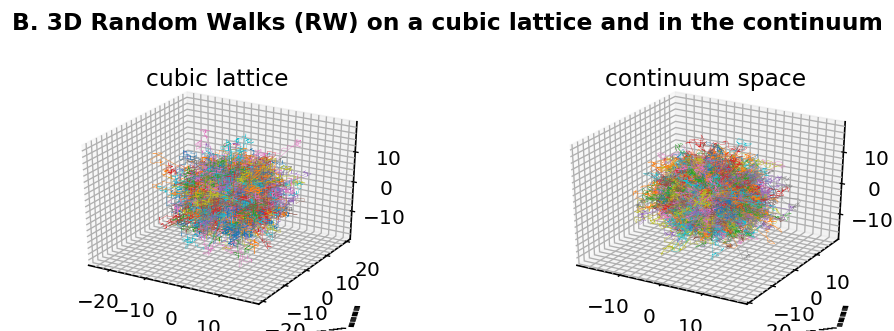

0.9992611483575242
1.0045926836483476


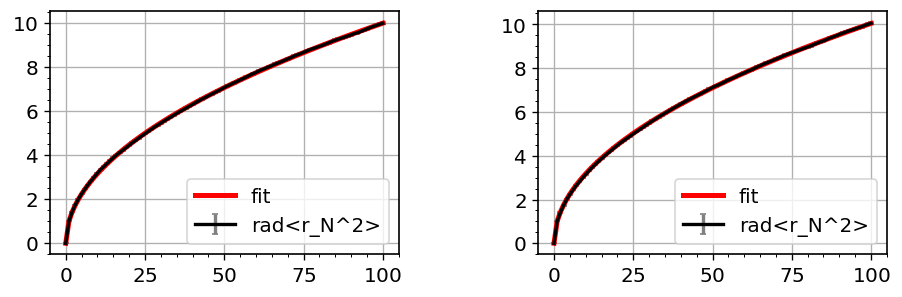

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('B. 3D Random Walks (RW) on a cubic lattice and in the continuum', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

Nplots = [1, 2]
subplots = [121, 122]
titles = ['cubic lattice', 'continuum space']
for plot in Nplots:
    data = np.loadtxt("data/output{}.txt".format(plot+2))
    ax = fig.add_subplot(subplots[plot-1], projection='3d')
    ax.set_title(titles[plot-1])
    for j in range(1000):
        x = np.zeros(303)
        y = np.zeros(303)
        z = np.zeros(303)
        for i in range(101):
            x[i] = data[3*i+303*j]
            y[i] = data[3*i+1+303*j]
            z[i] = data[3*i+2+303*j]
        ax.plot(x, y, z, "-", lw=0.2)
plt.show()


plt.figure(figsize=(9, 3), dpi=120)

data = np.loadtxt("data/output5.txt").T

def f(x,k):
    return k*(x**0.5)

for plot in Nplots:
    plt.subplot(1, 2, plot); 
    plt.errorbar(data[0],
                 data[plot], 
                 yerr=data[plot+2], 
                 color = 'black', 
                 ecolor = 'grey', 
                 label="rad<r_N^2>")
    p_opt,_ = curve_fit(f, data[0], data[plot])
    plt.plot(data[0],f(data[0],p_opt[0]),color = 'red', lw = 3, label='fit')
    plt.legend()
    
    print(p_opt[0])

plt.show()